<a href="https://colab.research.google.com/github/zenialexandre/image-processing/blob/main/partial_assessment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
'''
  Alexandre Zeni, Bruno Gabriel de Sousa & Lorhan Felipe Melo

  Objects Segmentation
'''

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2


In [40]:
# Generic functions to be used with Lymphocytes and Neutrophils images

def show_original_image(
  generic_loop_path: str,
  readed_generic_image: np.ndarray
) -> None:
  print('\n')
  plt.imshow(readed_generic_image)
  plt.title('Original Image of ' + generic_loop_path)
  plt.show()

def apply_kmeans_clustering_algorithm(
  readed_generic_image: np.ndarray
) -> None:
  readed_generic_image_vec: np.ndarray = readed_generic_image.reshape((-1, 3))
  readed_generic_image_vec = np.float32(readed_generic_image_vec)

  klusters_number: int = 4
  criteria: any = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.1)

  _, labels, centers = cv2.kmeans(
      readed_generic_image_vec,
      klusters_number,
      None,
      criteria,
      10,
      cv2.KMEANS_PP_CENTERS
  )

  segmented_image: np.ndarray = \
    np.uint8(centers)[labels.flatten()].reshape((readed_generic_image.shape))

  print('\n')
  plt.imshow(segmented_image)
  plt.title('Image with Kmeans applied.')
  plt.show()


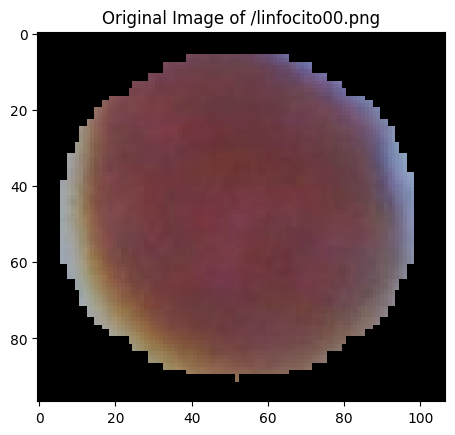

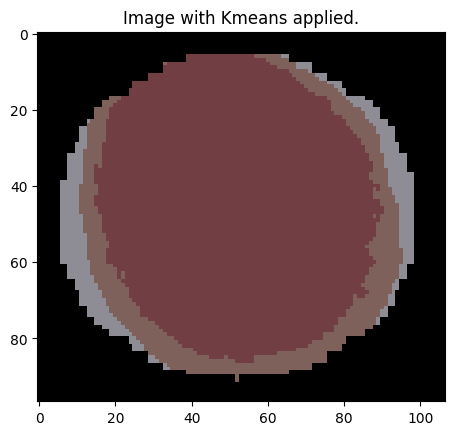

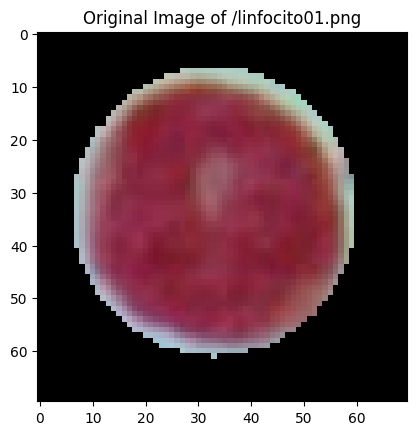

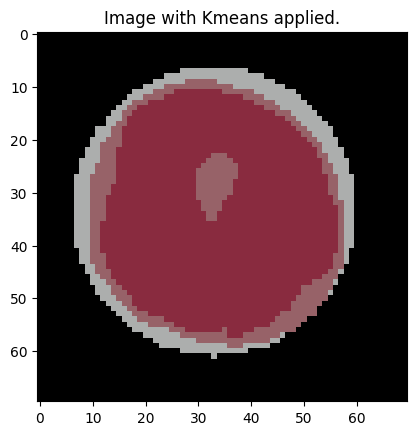

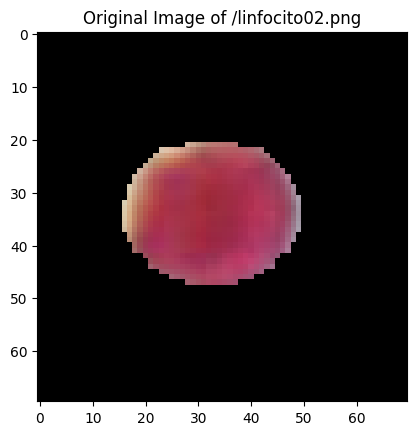

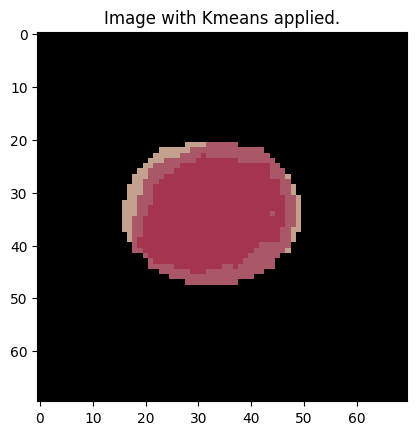

In [41]:
# Lymphocytes Images Processing

lymphocytes_base_path: str = '/linfocito0'

for index in range(0, 3):
  lymphocyte_loop_path: str = lymphocytes_base_path + str(index) + '.png'

  if (os.path.exists(lymphocyte_loop_path.strip())):
    readed_lymphocyte_image: np.ndarray = cv2.imread(lymphocyte_loop_path, cv2.COLOR_BGR2RGB)
    show_original_image(lymphocyte_loop_path, readed_lymphocyte_image)
    apply_kmeans_clustering_algorithm(readed_lymphocyte_image)


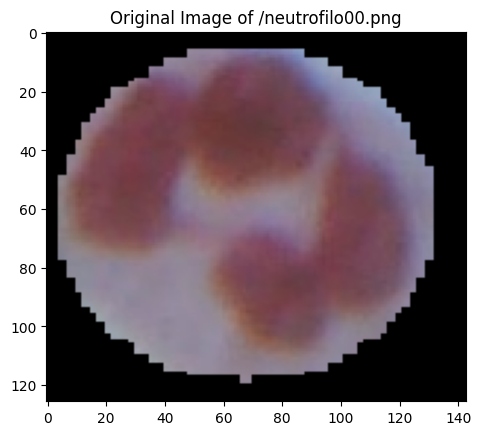

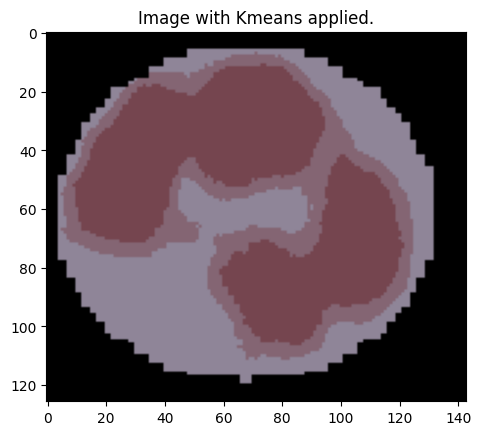

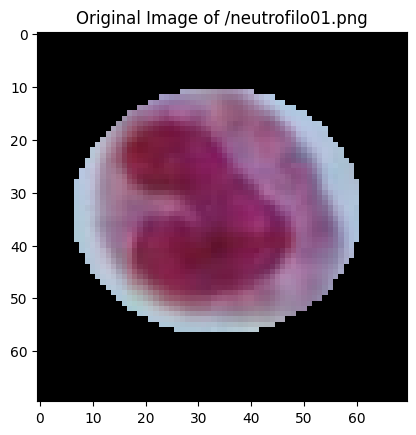

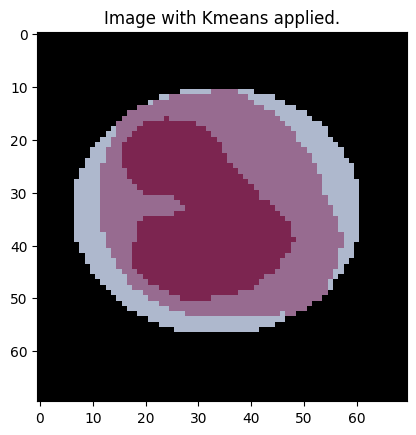

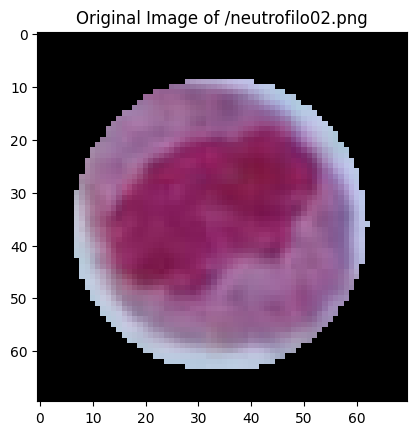

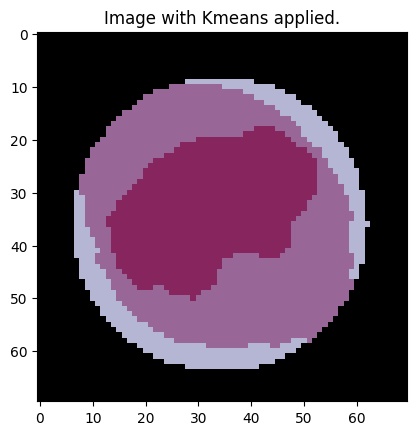

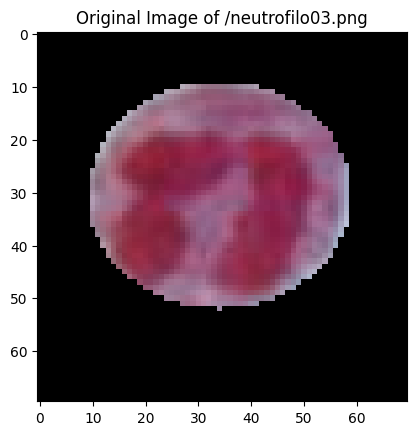

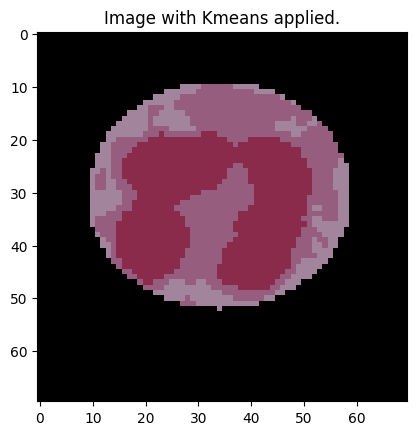

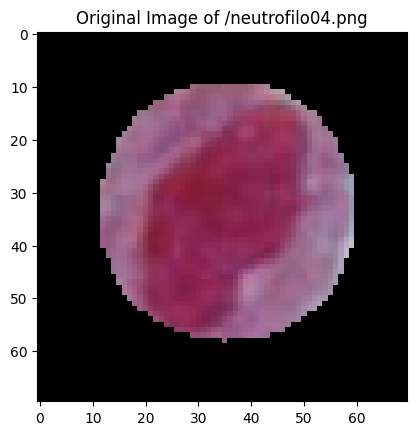

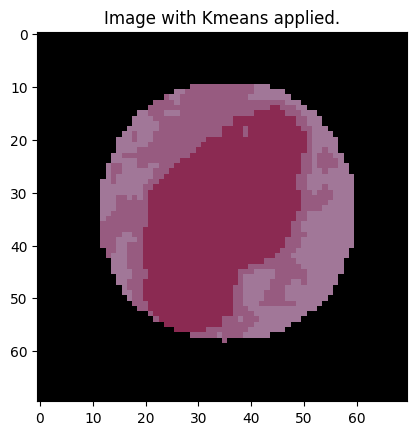

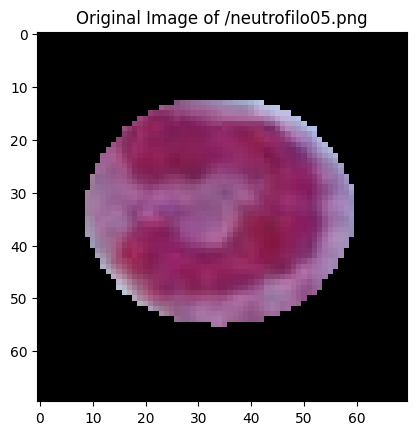

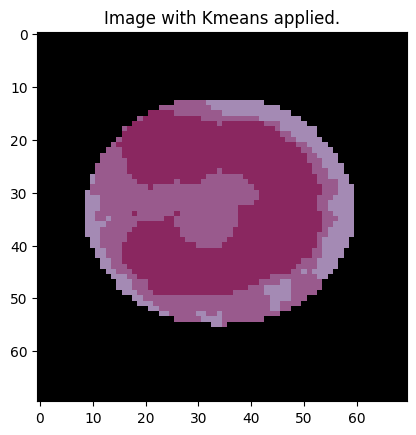

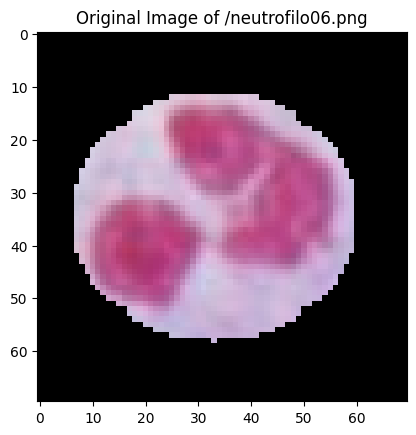

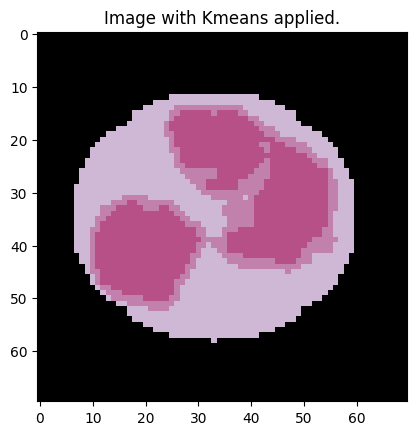

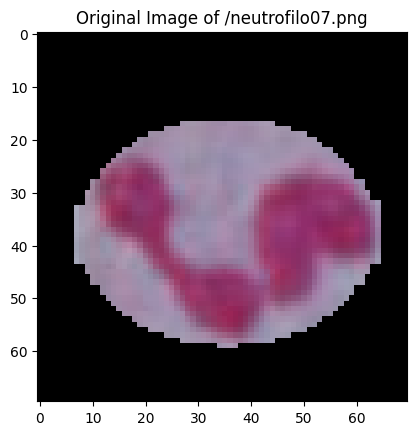

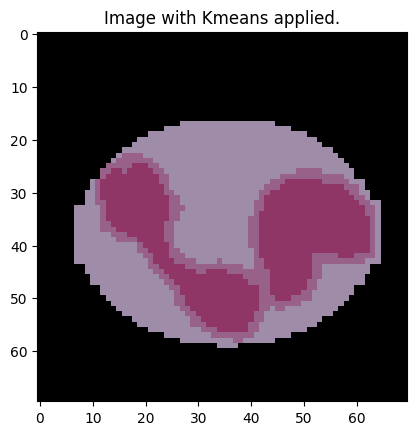

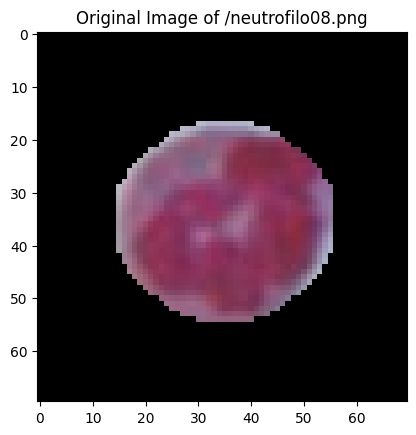

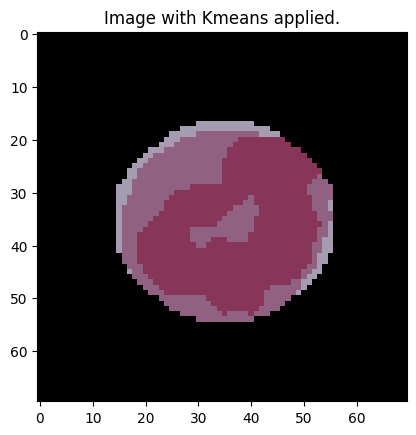

In [42]:
# Neutrophils Images Processing

neutrophils_base_path: str = '/neutrofilo0'

for index in range(0, 9):
  neutrophil_loop_path: str = neutrophils_base_path + str(index) + '.png'

  if (os.path.exists(neutrophil_loop_path.strip())):
    readed_neutrophil_image: np.ndarray = cv2.imread(neutrophil_loop_path, cv2.COLOR_BGR2RGB)
    show_original_image(neutrophil_loop_path, readed_neutrophil_image)
    apply_kmeans_clustering_algorithm(readed_neutrophil_image)